# McDonalds Customer Segmentation Analysis

In [69]:
# Installing Bioinfokit for Data Analysis and Visualization
!pip install bioinfokit


### Importing All Necessary Libraries For This Project

In [70]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
from sklearn import preprocessing
from bioinfokit.visuz import cluster
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Loading Data

In [71]:
 # Loading the dataset
df_mc = pd.read_csv("mcdonalds.csv")
df_copy = pd.read_csv("mcdonalds.csv")  # Load data again for backup

# **Exploring the Dataset**

In [72]:
# Displaying first 3 rows from the dataset
df_mc.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [73]:
# Displaying column names
column_names = df_mc.columns.values.tolist()

print(column_names)

['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender']


In [74]:
# Checking dimensions of the dataset
print(df_mc.shape)

(1453, 15)


In [75]:
# Checking the dataset's structure, data types, and missing values
df_mc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


The dataset is clean with no missing values. Most columns are categorical except for age. Since the segmentation variable (YES/NO) is not suitable for extraction, we convert it to numbers (YES = 1, NO = 0) to analyze customer opinions on different aspects of McDonald's. We take the first 11 columns, as they contain the segmentation variables, and verify the conversion by checking the average values.

In [76]:
# Converting 'Yes' to 1 and 'No' to 0 in first 11 columns
md_values = df_mc.iloc[:, 0:11].replace("Yes", 1).replace("No", 0)
avg_values = round(md_values.mean(), 2)  # Calculate the mean and round to 2 decimal places
avg_values

,0
yummy,0.55
convenient,0.91
spicy,0.09
fattening,0.87
greasy,0.53
fast,0.90
cheap,0.60
tasty,0.64
expensive,0.36
healthy,0.20


The average values show that 55% of people find McDonald's yummy, 91% think it's convenient, but only 9% say the food is spicy

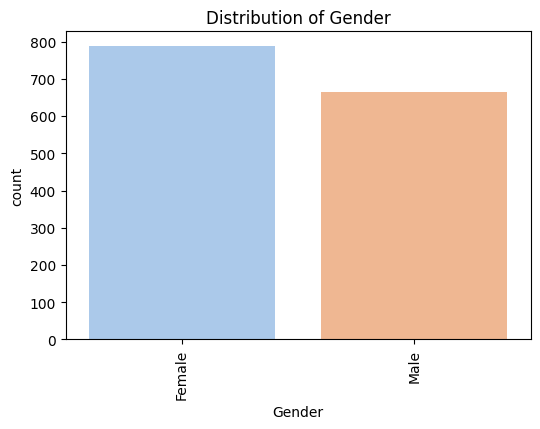

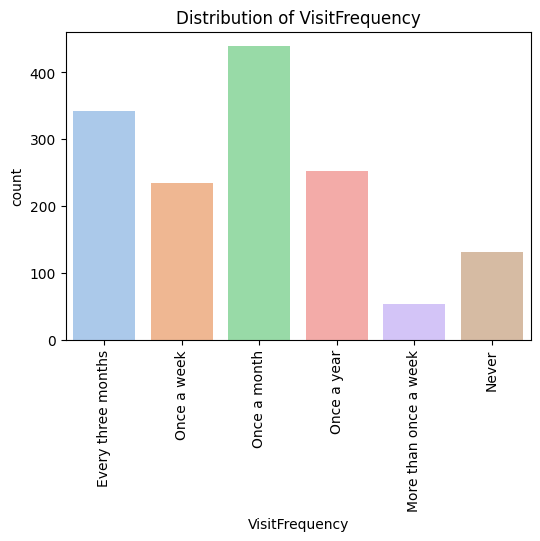

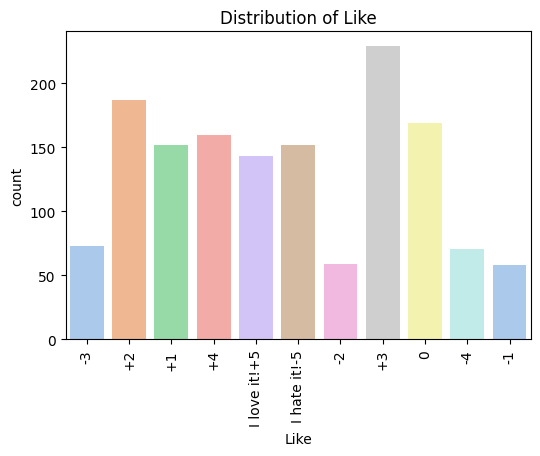

In [77]:
# Bar plot for categorical variables
def plot_categorical(column):
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df_mc, x=column, palette='pastel')
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=90)
    plt.show()

categorical_columns = ['Gender', 'VisitFrequency', 'Like']
for col in categorical_columns:
    plot_categorical(col)

As we can see, most people visit McDonald's once a month, while some go every three months or once a year. Very few visit more than once a week, showing that McDonald's is an occasional treat rather than a daily habit. Some people never visit, which is a chance to attract new customers with better offers. McDonald's can introduce loyalty programs or monthly deals to encourage more frequent visits.

Most people like McDonald's, with many rating it +3, +2, +4, or +1, but some gave low scores. This means most customers are happy, but some are not. McDonald's can improve by fixing common complaints and making food and service better.

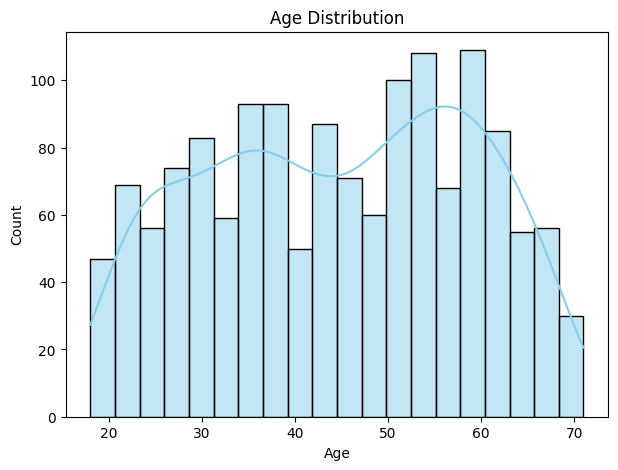

In [78]:
# Histogram and KDE Plot for Age
sns.histplot(df_mc['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Most people visiting McDonald's are between 30 and 60 years old, with the largest group around 50-60. There are fewer young adults in their 20s and seniors in their 70s. This means McDonald's is most popular with middle-aged people. To attract younger and older customers, they can introduce special discounts, healthy meal options, or promotions that appeal to these age groups.

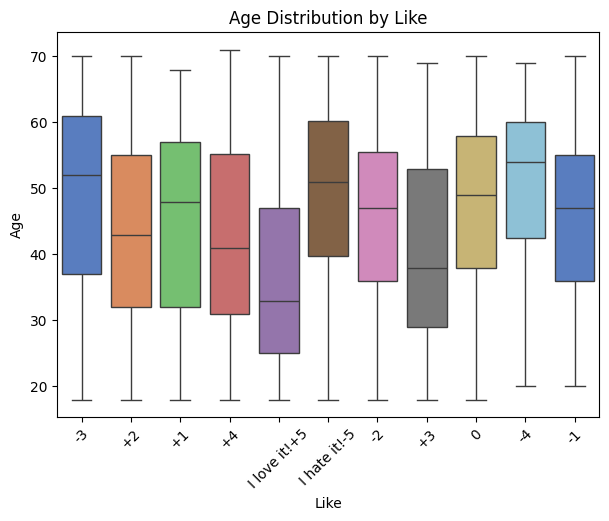

In [79]:
# Boxplot for Age vs. Like
sns.boxplot(data=df_mc, x='Like', y='Age', palette='muted')
plt.title('Age Distribution by Like')
plt.xticks(rotation=45)
plt.show()

Most people giving ratings are between 40 and 55 years old. The spread is similar across all groups, meaning people of all ages have different opinions. However, some extreme ratings, like "I love it! +5" and "I hate it! -5," have slightly different age patterns. McDonald's can use this to understand which age groups love or dislike their food the most and adjust their marketing or menu to appeal to them better.

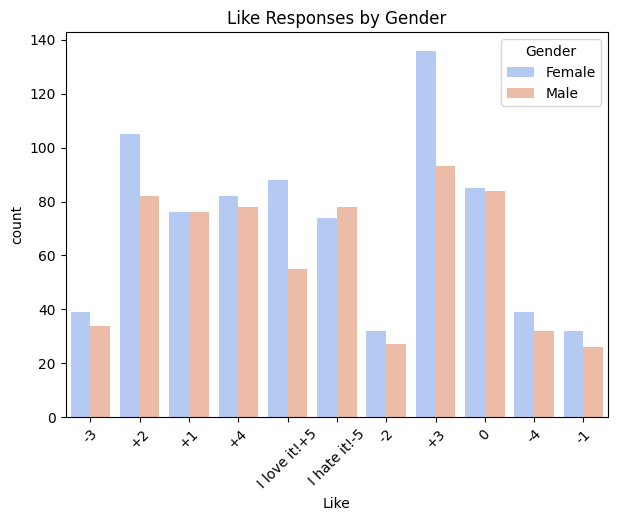

In [80]:
# Countplot for Like responses
sns.countplot(data=df_mc, x='Like', hue='Gender', palette='coolwarm')
plt.title('Like Responses by Gender')
plt.xticks(rotation=45)
plt.show()

As We can see, ,more women gave positive ratings, especially "+3" and "+2," while men had slightly lower counts in those categories. Both genders have similar responses in some categories, like "+1" and "I hate it! -5."

**Suggestion:**

**Targeted Promotions:** Since more women gave positive ratings, McDonald's can create promotions that appeal to them, such as healthier meal options or family discounts.

**Getting More Male Customers:** Since fewer men gave high ratings, McDonald's can offer special discounts, loyalty programs, or new food options that men might like to make them happier.

#### **Principal Component Analysis (PCA)**

I am using PCA to organize and show the binary data more clearly in the perception map. This method gives a better view of how attributes are connected compared to grouping raw data directly.

In [81]:
pca_model = PCA()  # Creating PCA model
md_pca_transformed = pca_model.fit_transform(md_values)  # Applying PCA transformation
md_pca_fit = pca_model.fit(md_values)  # Fiting PCA model

# Calculating standard deviation
std_dev = np.sqrt(pca_model.explained_variance_)
prop_variance = pca_model.explained_variance_ratio_

pc_index = []
for i in range(len(std_dev)):
    i = i + 1
    pc_index.append("PC{}".format(i))

summary_df = pd.DataFrame({
    "Standard Deviation": std_dev,
    "Proportion of Variance": prop_variance,
    "Cumulative Proportion": prop_variance.cumsum()
}, index=pc_index)  # Create a DataFrame with PCA results

summary_df


,Standard Deviation,Proportion of Variance,Cumulative Proportion
PC1,0.757050,0.299447,0.299447
PC2,0.607456,0.192797,0.492244
PC3,0.504619,0.133045,0.625290
PC4,0.398799,0.083096,0.708386
PC5,0.337405,0.059481,0.767866
PC6,0.310275,0.050300,0.818166
PC7,0.289697,0.043849,0.862015
PC8,0.275122,0.039548,0.901563
PC9,0.265251,0.036761,0.938323
PC10,0.248842,0.032353,0.970677


As we can see from the cumulative variance in our PCA analysis, the first two principal components (PC1 & PC2) explain **49.22%** of the total variance, with PC1 alone contributing **29.94%**. Together, the first four PCs capture **70.84%** of the variance. This suggests that most of the data’s variation is captured in the first few PCs, making them the most important for analysis.

In [82]:
# Print standard deviation rounded to 1 decimal place
print("Standard Deviation:\n", std_dev.round(1))

# Creating a DataFrame to store PCA loadings (how each variable contributes to PCs)
loadings = pca_model.components_
i = 0
rotation_matrix = md_pca_fit.components_.T
rot_df = pd.DataFrame(rotation_matrix, index=md_values.columns.values, columns=pc_index)
rot_df = round(rot_df, 3)

rot_df

Standard Deviation:
 [0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,0.477,-0.364,0.304,0.055,0.308,-0.171,-0.281,-0.013,-0.572,0.110,-0.045
convenient,0.155,-0.016,0.063,-0.142,-0.278,0.348,-0.060,0.113,0.018,0.666,0.542
spicy,0.006,-0.019,0.037,0.198,-0.071,0.355,0.708,-0.376,-0.400,0.076,-0.142
fattening,-0.116,0.034,0.322,-0.354,0.073,0.407,-0.386,-0.590,0.161,0.005,-0.251
greasy,-0.304,0.064,0.802,0.254,-0.361,-0.209,0.036,0.138,0.003,-0.009,-0.002
fast,0.108,0.087,0.065,-0.097,-0.108,0.595,-0.087,0.628,-0.166,-0.240,-0.339
cheap,0.337,0.611,0.149,0.119,0.129,0.103,-0.040,-0.140,-0.076,-0.428,0.489
tasty,0.472,-0.307,0.287,-0.003,0.211,0.077,0.360,0.073,0.639,-0.079,-0.020
expensive,-0.329,-0.601,-0.024,0.068,0.003,0.261,-0.068,-0.030,-0.067,-0.454,0.490
healthy,0.214,-0.077,-0.192,0.763,-0.288,0.178,-0.350,-0.176,0.186,0.038,-0.158


The PCA loadings help us see how people think about McDonald's:



* **PC1 (Food Enjoyment)**: People care about yummy, tasty, and cheap food the most.
* **PC2 (Cost Perception)**: Some see McDonald's as cheap, while others find it expensive.
* **PC3 (Greasy Feel)**: Many think McDonald's food is greasy.
* **PC4 (Health Concern)**: Some people consider McDonald's healthy, while others don’t.

This analysis shows what matters most to customers when they think about McDonald's.

**Let's visualize this in the principal component space to see how people perceive McDonald's.**

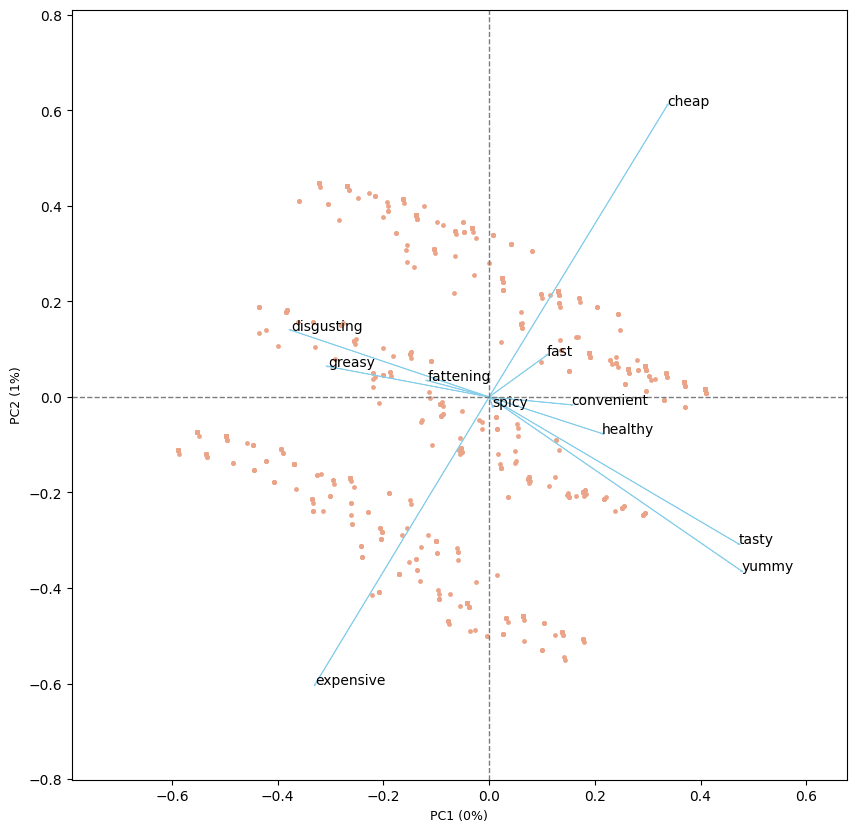

In [83]:
cluster.biplot(cscore=md_pca_transformed, loadings=loadings, labels=df_mc.columns.values,
               var1=0, var2=1, show=True, dim=(10, 10))  # Create a biplot

# **Extracting Segments Using K-means**

We will use K-Means for customer segmentation with 2 to 8 segments, running 10 times with different random initializations for each segment to ensure reliable results

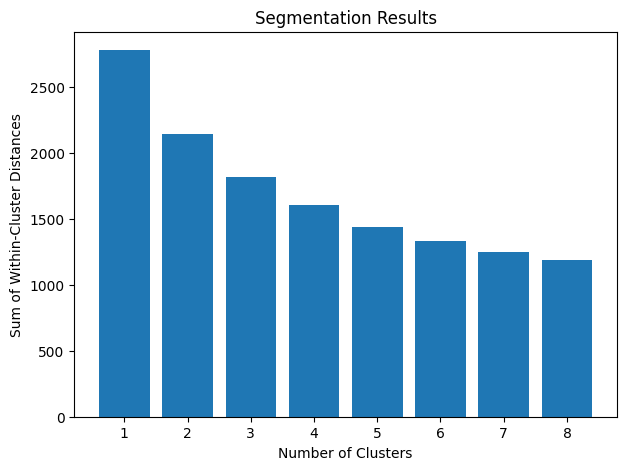

In [84]:
 # Seting random seed for reproducibility
np.random.seed(1234)  #

# Running K-Means clustering for 2 to 8 segments, each with 10 random initializations
num_repeats = 10
segment_range = range(1, 9)
wcss_values = []
km_models = {}

for num_clusters in segment_range:
    kmeans_model = KMeans(n_clusters=num_clusters, n_init=num_repeats, random_state=1234)  # Create KMeans model
    kmeans_model.fit(md_values)  # Fiting model to data
    wcss_values.append(kmeans_model.inertia_)  # Storing sum of within-cluster distances
    km_models[str(num_clusters)] = kmeans_model

# Ploting segmentation results
plt.bar(segment_range, wcss_values)
plt.xlabel("Number of Clusters")  # Label x-axis
plt.ylabel("Sum of Within-Cluster Distances")  # Label y-axis
plt.title("Segmentation Results")  # Set title
plt.show()  # Display plot


Before performing segmentation, we will check the stability of our clusters. Stability helps us understand whether the same segmentation patterns appear consistently when the data changes slightly.

To do this, **we will use bootstrap sampling**, where we repeatedly take random subsets of the data and apply K-Means clustering for different segment numbers (K=2 to 8).

For each **bootstrap sample**, we will:

* Run K-Means clustering 10 times (to get the best segmentation).
* Compare the resulting clusters to the full dataset using the Adjusted Rand Index (ARI).
* Measure how consistent and reliable each segmentation is.

Finally, we will plot a boxplot of ARI values to see which segmentation (number of clusters) is the most stable. A higher ARI with low variation suggests a more reliable segmentation choice.

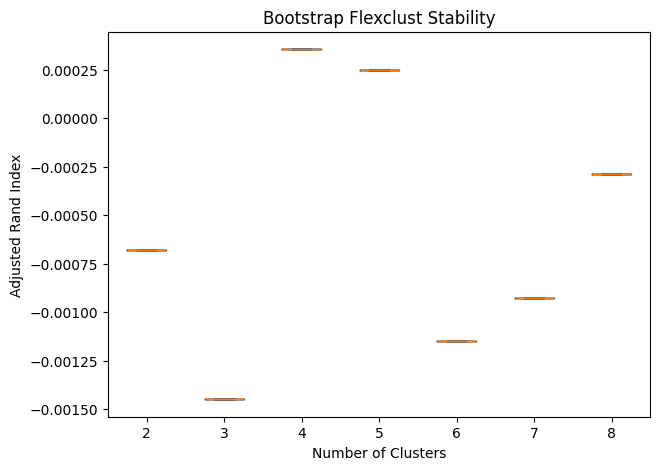

In [85]:
# Seting random seed for reproducibility
np.random.seed(1234)

# Defining parameters
num_bootstrap = 100
num_repeats = 10

# Creating bootstrap samples
bootstrap_data = []
for _ in range(num_bootstrap):
    boot_sample = resample(md_values.values, random_state=1234)  # Resample data
    bootstrap_data.append(boot_sample)

# Storing Adjusted Rand Index scores
ari_scores = []
cluster_range = range(2, 9)
for num_clusters in cluster_range:
    stability_scores = []
    for sample in bootstrap_data:
        kmeans_model = KMeans(n_clusters=num_clusters, n_init=num_repeats, random_state=1234)
        kmeans_model.fit(sample)
        predicted_labels = kmeans_model.predict(sample)
        original_labels = kmeans_model.predict(md_values.values)
        stability_score = adjusted_rand_score(original_labels, predicted_labels)
        stability_scores.append(stability_score)
    ari_scores.append(stability_scores)

# Transposing the ARI scores list
ari_scores = np.array(ari_scores).T

# Creating boxplot of Adjusted Rand Index
plt.boxplot(ari_scores, labels=cluster_range, whis=10)
plt.xlabel("Number of Clusters")  # Label x-axis
plt.ylabel("Adjusted Rand Index")  # Label y-axis
plt.title("Bootstrap Flexclust Stability")  # Set title
plt.show()  # Display plot


As we can see from the box plot, the two- and three-segment solutions are highly stable, but they do not capture enough variation in customer segments to provide useful market insights. **The four-segment solution (K=4)** appears to be the best balance, as it maintains both stability and meaningful segmentation. Beyond K=5, stability drops significantly, making those segmentations less reliable.

**Now, we will analyze the four-segment solution using a gorge plot to understand the similarity distribution within each cluster.**

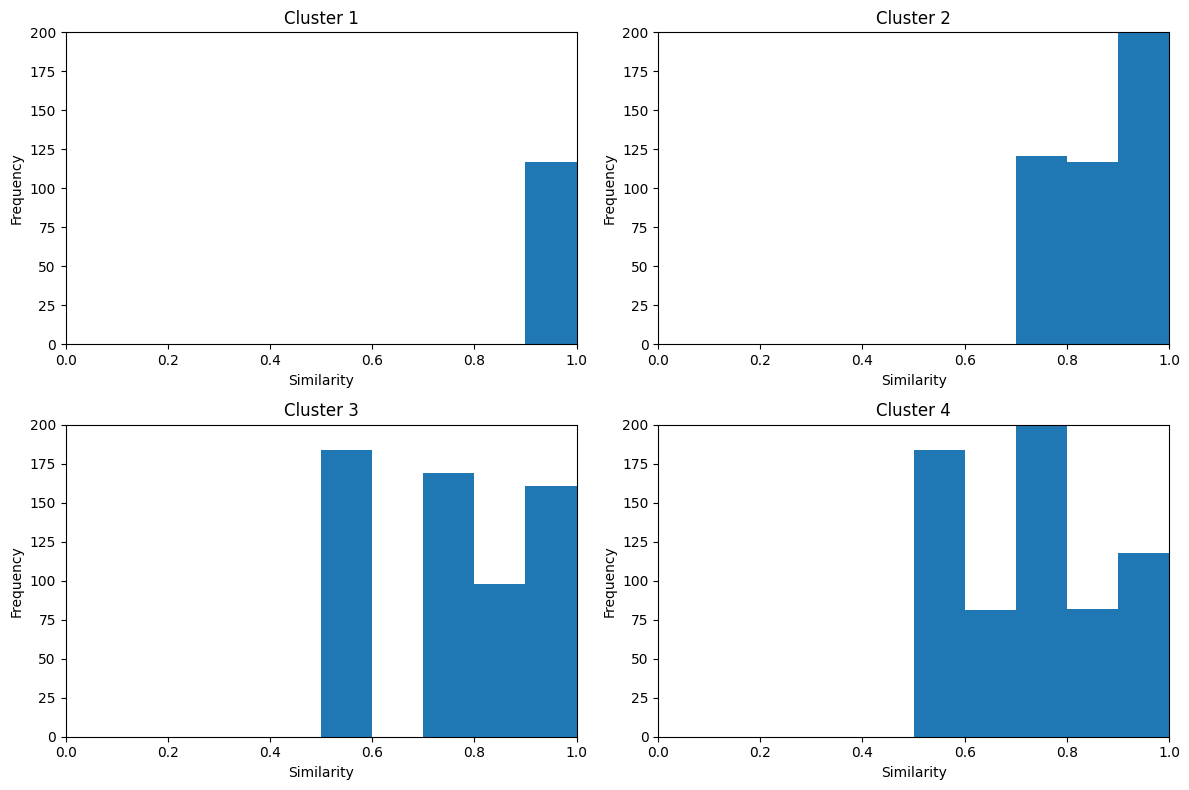

In [86]:
# Defining parameters
range_vals = (0, 1)
num_bins = 10
max_freq = 200

# Creating a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for cluster_num in range(1, 5):
    cluster_labels = km_models[str(cluster_num)].predict(md_values)
    similarity_scores = km_models[str(cluster_num)].transform(md_values).min(axis=1)

    row = (cluster_num - 1) // 2
    col = (cluster_num - 1) % 2

    axes[row, col].hist(similarity_scores, bins=num_bins, range=range_vals)
    axes[row, col].set_xlabel('Similarity')
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].set_title(f'Cluster {cluster_num}')

    axes[row, col].set_xlim(range_vals)
    axes[row, col].set_ylim(0, max_freq)
    axes[row, col].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

plt.tight_layout()
plt.show()


**Let's explore another way to assess segmentation stability by tracking how segment memberships evolve as more clusters are added using the SLSA plot.**

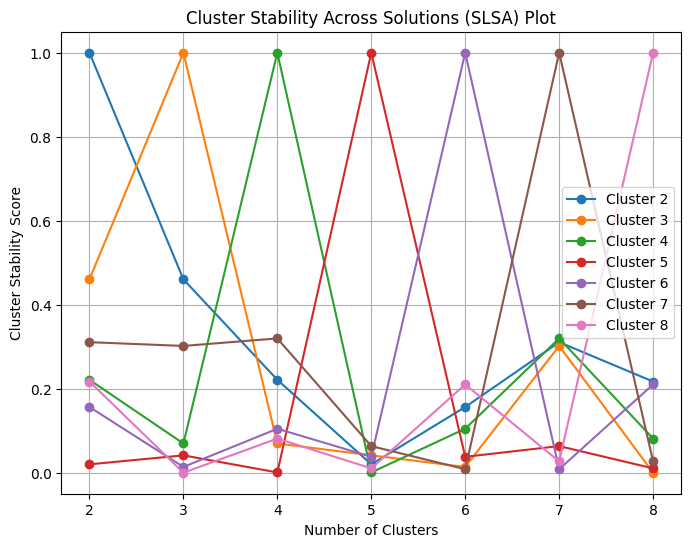

In [87]:
# Defining range for number of segments
segment_range = range(2, 9)

# Store stability scores
stability_scores = []
for num_clusters in segment_range:
    cluster_labels = km_models[str(num_clusters)].predict(md_values)
    stability_scores.append(cluster_labels)

# Creating the plot
plt.figure(figsize=(8, 6))
for i, num_clusters in enumerate(segment_range):
    plt.plot(segment_range, [np.mean(stability_scores[i] == labels) for labels in stability_scores],
             marker='o', label=f'Cluster {num_clusters}')

plt.xlabel('Number of Clusters')
plt.ylabel('Cluster Stability Score')
plt.title('Cluster Stability Across Solutions (SLSA) Plot')
plt.xticks(segment_range)
plt.legend()
plt.grid(True)

plt.show()


As we can see above in the SLSA plot, segment memberships remain stable up to K=4, with strong connections indicating consistent groupings. Beyond K=5, segments start splitting and merging frequently, reducing stability. This suggests that K=4 is the best balance between differentiation and reliability for segmentation.

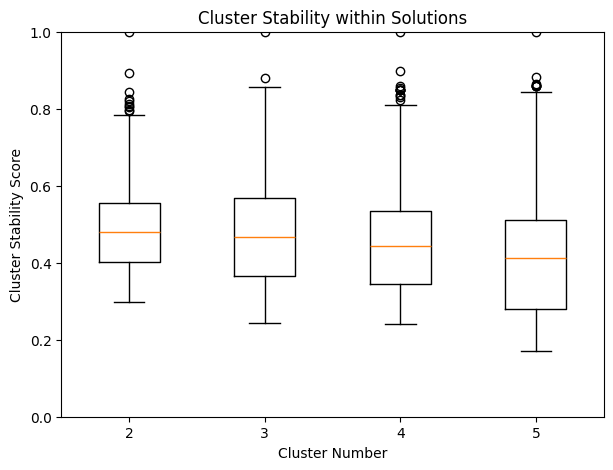

In [88]:
# Defining segment solutions to analyze
cluster_solutions = ["2", "3", "4", "5"]

cluster_labels = {}  # Storing predicted labels for each cluster solution
cluster_similarities = {}  # Storing similarity scores for each cluster solution

# Computing cluster labels and similarity scores
for cluster in cluster_solutions:
    cluster_labels[cluster] = km_models[cluster].predict(md_values)
    cluster_similarities[cluster] = km_models[cluster].transform(md_values).min(axis=1)

# Computing segment stability scores
stability_scores = []
for cluster in cluster_solutions:
    similarity_scores = cluster_similarities[cluster]
    normalized_scores = similarity_scores / np.max(similarity_scores)
    stability_scores.append(normalized_scores)

# Creating a boxplot for segment stability
plt.boxplot(stability_scores, whis=1.5)
plt.xlabel("Cluster Number")
plt.ylabel("Cluster Stability Score")
plt.xticks(range(1, len(cluster_solutions) + 1), cluster_solutions)
plt.ylim(0, 1)
plt.title("Cluster Stability within Solutions")

plt.show()


# **Evaluating Customer Segments using Statistical Metrics**

In [89]:
# Imporingt entropy function
from scipy.stats import entropy

np.random.seed(1234)  # Seting random seed for reproducibility

cluster_range = range(2, 9)
model_metrics = []

# Iterating over different cluster sizes
for num_clusters in cluster_range:
    kmeans_model = KMeans(n_clusters=num_clusters, random_state=1234)  # Create KMeans model
    kmeans_model.fit(md_values.values)

    num_iterations = kmeans_model.n_iter_
    converged_status = True
    log_likelihood = -kmeans_model.inertia_
    num_samples, _ = md_values.shape

    # Calculating model selection criteria
    aic_score = -2 * log_likelihood + 2 * num_clusters
    bic_score = -2 * log_likelihood + np.log(num_samples) * num_clusters

    # Computing entropy for cluster labels
    cluster_labels = kmeans_model.labels_
    label_counts = np.bincount(cluster_labels)
    label_probs = label_counts / float(label_counts.sum())
    cluster_entropy = entropy(label_probs)

    # Computing ICL (Integrated Completed Likelihood)
    icl_score = bic_score - cluster_entropy

    # Store results
    model_metrics.append((num_iterations, converged_status, num_clusters, num_clusters,
                          log_likelihood, aic_score, bic_score, icl_score))

# Converting results to DataFrame
model_metrics_df = pd.DataFrame(model_metrics, columns=['Iterations', 'Converged', 'Clusters', 'Initial Clusters',
                                                         'Log Likelihood', 'AIC', 'BIC', 'ICL'])

print(model_metrics_df)


   Iterations  Converged  Clusters  Initial Clusters  Log Likelihood  \
0          10       True         2                 2    -2146.062044   
1           5       True         3                 3    -1896.330266   
2           9       True         4                 4    -1603.913802   
3           9       True         5                 5    -1502.697153   
4           7       True         6                 6    -1348.665399   
5          10       True         7                 7    -1249.233890   
6           9       True         8                 8    -1203.646165   

           AIC          BIC          ICL  
0  4296.124088  4306.686859  4306.015908  
1  3798.660532  3814.504689  3813.529671  
2  3215.827604  3236.953147  3235.627738  
3  3015.394306  3041.801234  3040.267284  
4  2709.330799  2741.019113  2739.277954  
5  2512.467780  2549.437480  2547.530062  
6  2423.292330  2465.543415  2463.533662  


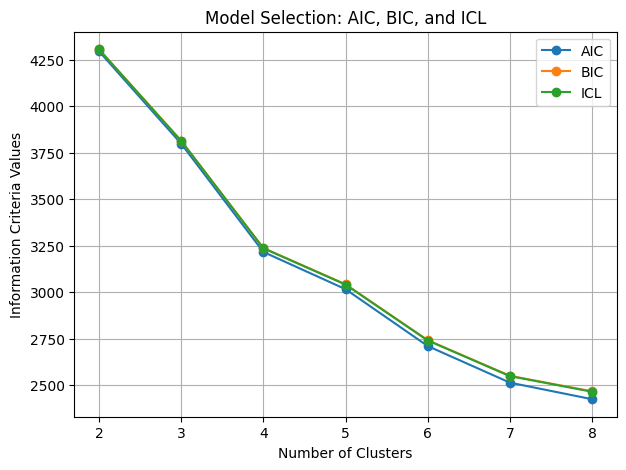

In [90]:
# Extracting cluster numbers and information criteria values
num_clusters = model_metrics_df["Clusters"]
aic_scores = model_metrics_df["AIC"]
bic_scores = model_metrics_df["BIC"]
icl_scores = model_metrics_df["ICL"]

# Ploting AIC, BIC, and ICL values
plt.plot(num_clusters, aic_scores, marker='o', label='AIC')
plt.plot(num_clusters, bic_scores, marker='o', label='BIC')
plt.plot(num_clusters, icl_scores, marker='o', label='ICL')

plt.xlabel('Number of Clusters')
plt.ylabel('Information Criteria Values')
plt.title('Model Selection: AIC, BIC, and ICL')
plt.legend()
plt.grid(True)

plt.show()


As we can see in the graph, the AIC, BIC, and ICL values drop sharply as the number of segments increases. The decline slows after four segments, making it a practical choice for balancing complexity and interpretability.

#### Comparing K-Means and Gaussian Mixture Model (GMM) for Customer Segmentation

In [91]:
from sklearn.mixture import GaussianMixture  # Import Gaussian Mixture Model
from sklearn.cluster import KMeans  # Import KMeans
import pandas as pd  # Import pandas

num_clusters = 4  # Set number of clusters

# Apply KMeans clustering
kmeans_model = KMeans(n_clusters=num_clusters, random_state=1234)
kmeans_model.fit(md_values)
kmeans_labels = kmeans_model.predict(md_values)  # Get cluster labels

# Apply Gaussian Mixture Model (GMM) clustering
gmm_model = GaussianMixture(n_components=num_clusters, random_state=1234)
gmm_model.fit(md_values)
gmm_labels = gmm_model.predict(md_values)  # Get GMM cluster labels

# Store KMeans and GMM results in a DataFrame
clustering_results = pd.DataFrame({'KMeans': kmeans_labels, 'GMM': gmm_labels})

# Extract subset of data where GMM assigned cluster 3
subset_gmm_cluster3 = md_values[clustering_results['GMM'] == 3]

# Apply KMeans to the subset
kmeans_subset_model = KMeans(n_clusters=num_clusters, random_state=1234)
kmeans_subset_model.fit(subset_gmm_cluster3)
kmeans_subset_labels = kmeans_subset_model.predict(subset_gmm_cluster3)

# Store results of re-clustering
subset_results = pd.DataFrame({'KMeans_Subset': kmeans_subset_labels, 'GMM': 3})

cross_tab_1 = pd.crosstab(clustering_results['KMeans'], clustering_results['GMM'])
cross_tab_2 = pd.crosstab(clustering_results['KMeans'], subset_results['KMeans_Subset'])

print(cross_tab_1)
print(cross_tab_2)


GMM       0    1    2    3
KMeans                    
0       546    0    1   33
1         0  213   11    4
2        46    3  265    8
3        29   38    0  256
KMeans_Subset   0   1   2   3
KMeans                       
0              51  15  35  20
1              18   8  11  11
2              23   9  14  22
3              29   5  15  15


In [92]:
from tabulate import tabulate
# Displaying cross-tabulations in table format
print("\nComparison of K-Means and GMM Clustering:")
print(tabulate(cross_tab_1, headers="keys", tablefmt="fancy_grid"))

print("\nRe-Clustering of GMM Cluster 3 Using K-Means:")
print(tabulate(cross_tab_2, headers="keys", tablefmt="fancy_grid"))


Comparison of K-Means and GMM Clustering:
╒══════════╤═════╤═════╤═════╤═════╕
│   KMeans │   0 │   1 │   2 │   3 │
╞══════════╪═════╪═════╪═════╪═════╡
│        0 │ 546 │   0 │   1 │  33 │
├──────────┼─────┼─────┼─────┼─────┤
│        1 │   0 │ 213 │  11 │   4 │
├──────────┼─────┼─────┼─────┼─────┤
│        2 │  46 │   3 │ 265 │   8 │
├──────────┼─────┼─────┼─────┼─────┤
│        3 │  29 │  38 │   0 │ 256 │
╘══════════╧═════╧═════╧═════╧═════╛

Re-Clustering of GMM Cluster 3 Using K-Means:
╒══════════╤═════╤═════╤═════╤═════╕
│   KMeans │   0 │   1 │   2 │   3 │
╞══════════╪═════╪═════╪═════╪═════╡
│        0 │  51 │  15 │  35 │  20 │
├──────────┼─────┼─────┼─────┼─────┤
│        1 │  18 │   8 │  11 │  11 │
├──────────┼─────┼─────┼─────┼─────┤
│        2 │  23 │   9 │  14 │  22 │
├──────────┼─────┼─────┼─────┼─────┤
│        3 │  29 │   5 │  15 │  15 │
╘══════════╧═════╧═════╧═════╧═════╛


As we can see in the output, most clusters align well between K-Means and GMM, but some overlap exists. K-Means Cluster 0 mostly matches GMM Cluster 0, while K-Means Cluster 1 aligns well with GMM Cluster 1, though a few points are spread across other clusters. GMM allows for more mixing, meaning some data points are not clearly assigned to a single group. This is especially noticeable in GMM Cluster 3, which contains a mix of points from different K-Means clusters. When we re-cluster GMM Cluster 3 using K-Means, it gets divided into smaller groups, showing that GMM identified a more complex and overlapping segment, while K-Means forced clearer separations. This suggests that K-Means works best when distinct groups are needed, while GMM is better when clusters naturally overlap.

**Evaluating Log-Likelihood of Gaussian Mixture Models**

In [93]:
from sklearn.mixture import GaussianMixture  # Import Gaussian Mixture Model
import numpy as np  # Import NumPy

# Fit first GMM model
gmm_model_1 = GaussianMixture(n_components=4)  # Create GMM with 4 components
gmm_model_1.fit(md_values)  # Fit model to data
log_likelihood_1 = gmm_model_1.score(md_values)  # Compute log-likelihood

# Fit second GMM model
gmm_model_2 = GaussianMixture(n_components=4)  # Create another GMM with 4 components
gmm_model_2.fit(md_values)  # Fit model to data
log_likelihood_2 = gmm_model_2.score(md_values)  # Compute log-likelihood

# Print log-likelihood values
print("Log-likelihood for first GMM model:", log_likelihood_1)
print("Log-likelihood for second GMM model:", log_likelihood_2)


Log-likelihood for first GMM model: 9.456781748071887
Log-likelihood for second GMM model: 3.6427464011765807


As we can see, the first GMM fits the data better than the second, as it has a higher log-likelihood

# **Segmenting Customers Based on Their Perceptions Using Regression Models**

In [94]:
# Counting occurrences of each unique value in the 'Like' column
like_frequencies = pd.value_counts(df_mc['Like'])

# Reverse the order of counts
reversed_frequencies = like_frequencies.iloc[::-1]

print(reversed_frequencies)

Like
-1               58
-2               59
-4               71
-3               73
I love it!+5    143
I hate it!-5    152
+1              152
+4              160
0               169
+2              187
+3              229
Name: count, dtype: int64


In [95]:
# Defining a mapping of string values to numeric codes
like_scale_mapping = {
    'I HATE IT!-5': -5,
    '-4': -4,
    '-3': -3,
    '-2': -2,
    '-1': -1,
    '0': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    'I LOVE IT!+5': 5
}

# Applying mapping to convert 'Like' column to numerical values
df_mc['Like_Numeric'] = df_mc['Like'].map(like_scale_mapping)

# Counting occurrences of each numeric value
like_numeric_counts = df_mc['Like_Numeric'].value_counts()

print(like_numeric_counts)


Like_Numeric
 0.0    169
-3.0     73
-4.0     71
-2.0     59
-1.0     58
Name: count, dtype: int64


In [96]:
# Importing dmatrices for formula-based matrix creation
from patsy import dmatrices

# Selecting independent variables (first 11 columns)
independent_features = df_mc.columns[0:11]

# Creating formula string for regression
formula_expression = ' + '.join(independent_features)
formula_expression = 'Like ~ ' + formula_expression

# Generating the design matrix (fitting matrix)
design_matrix = dmatrices(formula_expression, data=df_mc)[1]

print(design_matrix)

[[1. 0. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 1. 1. 0.]
 ...
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 1. 0. 1.]]


#### **Segmenting Consumers Using Mixture Regression Models**

In [97]:
from sklearn.mixture import GaussianMixture  # Import Gaussian Mixture Model
from patsy import dmatrix  # Import dmatrix for regression design matrix
import numpy as np  # Import NumPy

np.random.seed(1234)  # Set random seed for reproducibility

# Create design matrix for independent variables
X_matrix = dmatrix(design_matrix.design_info, data=df_mc)

# Create target variable matrix
y_matrix = dmatrix('Like', data=df_mc)

# Define model parameters
num_components = 2  # Number of Gaussian components
num_initializations = 10  # Number of initializations
verbose_output = False  # Verbose mode
num_repeats = 10  # Number of repetitions

# Fit Gaussian Mixture Model
gmm_regression_model = GaussianMixture(n_components=num_components, n_init=num_initializations, verbose=verbose_output)
gmm_regression_model.fit(X_matrix, y_matrix)

# Print model summary
print(gmm_regression_model)

# Compute cluster sizes
cluster_counts = np.bincount(gmm_regression_model.predict(X_matrix))

# Print cluster sizes
print("Cluster sizes:")
for i, size in enumerate(cluster_counts):
    print(f"Cluster {i+1}: {size}")


GaussianMixture(n_components=2, n_init=10, verbose=False)
Cluster sizes:
Cluster 1: 985
Cluster 2: 468


As we can see, the model has divided customers into two groups based on their opinions about McDonald's. Cluster 1 has 985 people, and Cluster 2 has 468. This means different groups of customers have similar reasons for liking or disliking McDonald's, helping in better-targeted marketing.

# **Profiling K-Means Segments Using Bar Charts**

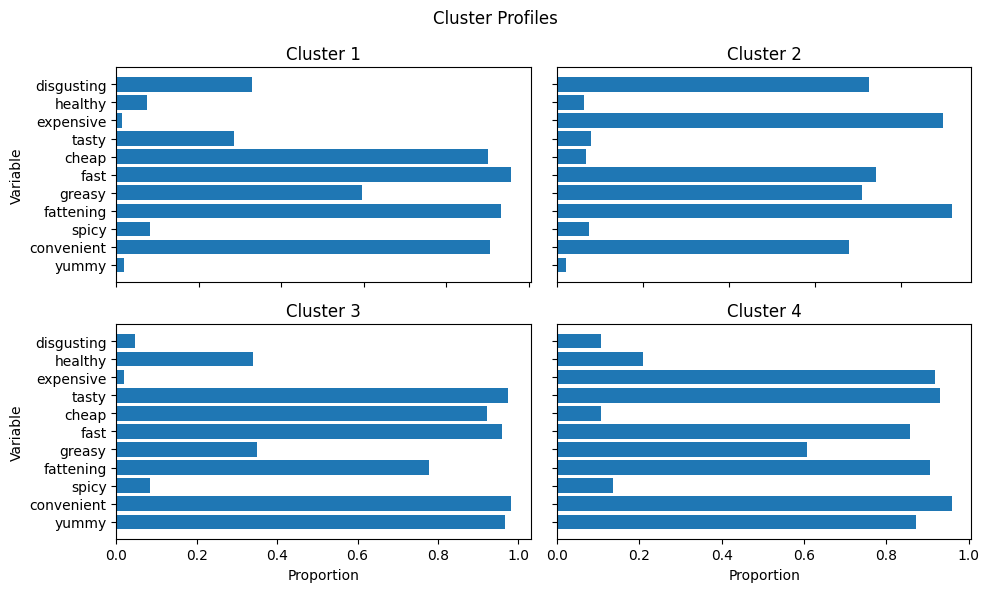

In [98]:
# KMeans model for 4 clusters
kmeans_model = km_models['4']

cluster_labels = kmeans_model.labels_

# Computing mean values for each cluster
cluster_means = md_values.groupby(cluster_labels).mean()

# Creating a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Plot bar charts for each cluster
axes[0, 0].barh(range(cluster_means.shape[1]), cluster_means.iloc[0])
axes[0, 0].set_title('Cluster 1')

axes[0, 1].barh(range(cluster_means.shape[1]), cluster_means.iloc[1])
axes[0, 1].set_title('Cluster 2')

axes[1, 0].barh(range(cluster_means.shape[1]), cluster_means.iloc[2])
axes[1, 0].set_title('Cluster 3')

axes[1, 1].barh(range(cluster_means.shape[1]), cluster_means.iloc[3])
axes[1, 1].set_title('Cluster 4')

# Seting labels and ticks for each subplot
for ax in axes.flat:
    ax.set(ylabel='Variable', xlabel='Proportion')
    ax.set_yticks(range(cluster_means.shape[1]))
    ax.set_yticklabels(md_values.columns)

# Removing overlapping labels
for ax in axes.flat:
    ax.label_outer()

fig.suptitle('Cluster Profiles')

fig.tight_layout()
plt.show()

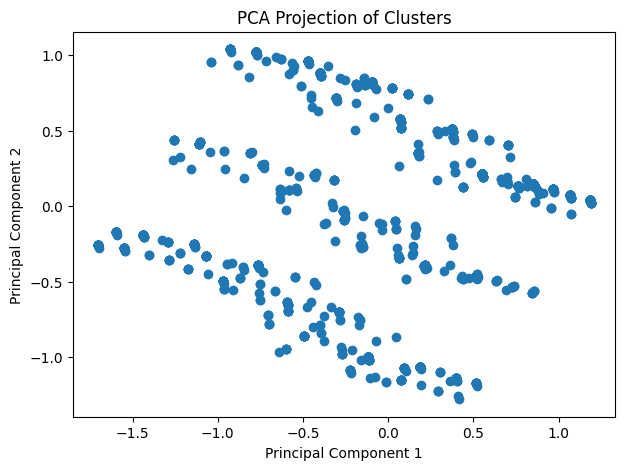

In [99]:
from sklearn.cluster import KMeans  # Import KMeans for clustering
from sklearn.decomposition import PCA  # Import PCA for dimensionality reduction
import matplotlib.pyplot as plt  # Import Matplotlib for visualization

# Apply KMeans clustering with 4 clusters
kmeans_model = KMeans(n_clusters=4, random_state=1234)
kmeans_model.fit(md_values)  # Fit KMeans model to data

# Apply PCA to reduce dimensions to 2 components
pca_model = PCA(n_components=2)
md_pca_transformed = pca_model.fit_transform(md_values)

# Create scatter plot of PCA-transformed data
fig, ax = plt.subplots()
ax.scatter(md_pca_transformed[:, 0], md_pca_transformed[:, 1])
ax.set_xlabel('Principal Component 1')  # Label x-axis
ax.set_ylabel('Principal Component 2')  # Label y-axis
ax.set_title('PCA Projection of Clusters')  # Add title

plt.show()  # Display the plot


#### **Analyzing Cluster Preferences Using Mosaic Plot**

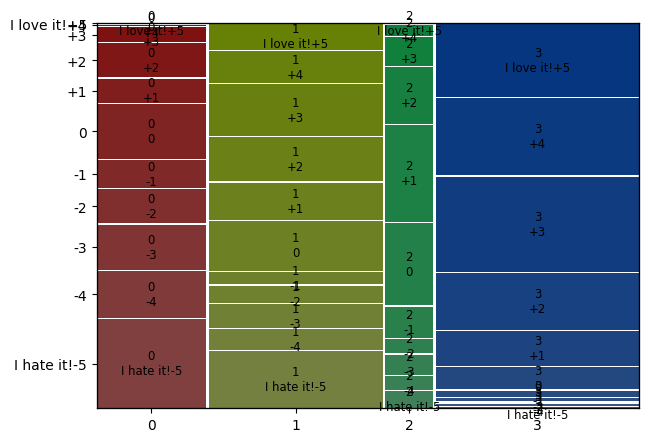

In [100]:
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Function to apply label encoding
def encode_labels(column_name):
    df_copy[column_name] = LabelEncoder().fit_transform(df_copy[column_name])
    return df_copy

# List of categorical columns to encode
categorical_columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
                       'tasty', 'expensive', 'healthy', 'disgusting']

# Apply label encoding
for column in categorical_columns:
    encode_labels(column)

# Extract encoded categorical data
df_encoded = df_copy.loc[:, categorical_columns]

# Apply KMeans clustering
kmeans_model = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_encoded)
df_copy['Cluster_Label'] = kmeans_model.labels_

# Create a crosstab
cluster_crosstab = pd.crosstab(df_copy['Cluster_Label'], df_copy['Like'])

# Define the correct column order based on actual column names
column_order = ['I hate it!-5', '-4', '-3', '-2', '-1', '0', '+1', '+2', '+3', '+4', 'I love it!+5']

# Keep only existing columns in the correct order
column_order = [col for col in column_order if col in cluster_crosstab.columns]

# Reorder columns in the crosstab
cluster_crosstab = cluster_crosstab[column_order]

# Set figure size and plot
plt.rcParams['figure.figsize'] = (7, 5)
mosaic(cluster_crosstab.stack())
plt.show()


In [101]:
print(cluster_crosstab.columns)

Index(['I hate it!-5', '-4', '-3', '-2', '-1', '0', '+1', '+2', '+3', '+4',
       'I love it!+5'],
      dtype='object', name='Like')


# **Describing Segments Across Gender and Age**

#### Visualizing Gender Distribution Across Clusters Using Mosaic Plot

Gender  Female  Male
row_0               
0          213   151
1          101   139
2          324   209
3          150   166


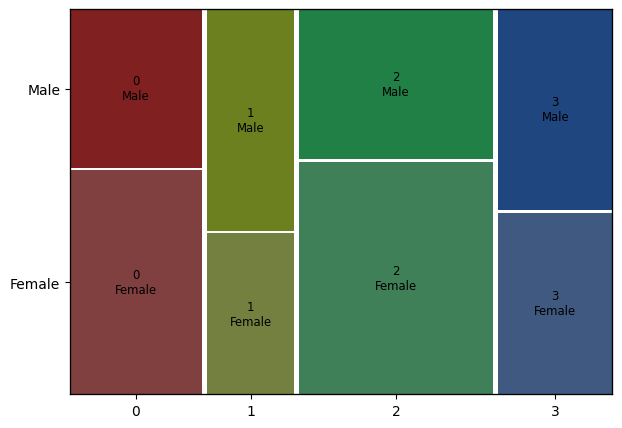

In [102]:
from statsmodels.graphics.mosaicplot import mosaic

# KMeans model for 4 clusters
kmeans_model_4 = km_models['4']

cluster_labels_4 = kmeans_model_4.labels_

# Creating a crosstab of clusters vs. Gender
cluster_gender_crosstab = pd.crosstab(cluster_labels_4, df_mc['Gender'])

print(cluster_gender_crosstab)
mosaic(cluster_gender_crosstab.stack(), gap=0.01)

plt.show()

#### Analyzing Age Distribution Across Clusters Using Box Plot

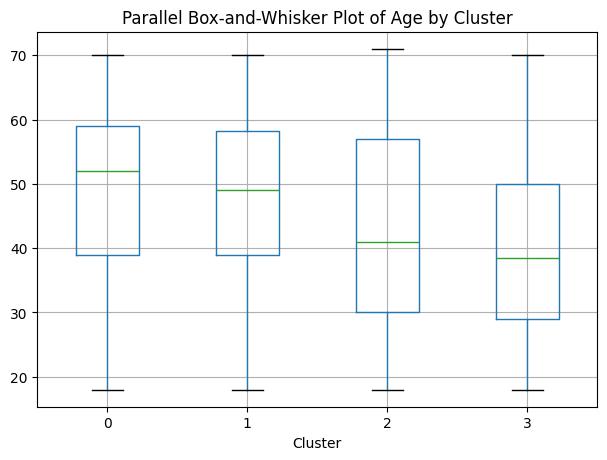

In [103]:
# Creating a DataFrame with cluster labels and age
df_boxplot = pd.DataFrame({'Cluster': cluster_labels_4, 'Age': df_mc['Age']})

df_boxplot.boxplot(by='Cluster', column='Age')

plt.title('Parallel Box-and-Whisker Plot of Age by Cluster')
plt.suptitle('')

plt.show()


#### Analyzing Visit Frequency Across Clusters

In [104]:
from sklearn.preprocessing import LabelEncoder

# Encoding 'VisitFrequency' column
df_copy['Visit_Frequency_Encoded'] = LabelEncoder().fit_transform(df_copy['VisitFrequency'])

# Computing the mean visit frequency for each cluster
visit_freq_mean = df_copy.groupby('Cluster_Label')['Visit_Frequency_Encoded'].mean()

# Converting to DataFrame and reset index
visit_freq_df = visit_freq_mean.to_frame().reset_index()

visit_freq_df

,Cluster_Label,Visit_Frequency_Encoded
0,0,2.787162
1,1,2.596195
2,2,2.618321
3,3,2.598553


In [105]:
from sklearn.preprocessing import LabelEncoder

# Encodin 'Like' column
df_copy['Like_Encoded'] = LabelEncoder().fit_transform(df_copy['Like'])

# Computing the mean 'Like' score for each cluster
like_mean = df_copy.groupby('Cluster_Label')['Like_Encoded'].mean()

# Converting to DataFrame and reset index
like_mean_df = like_mean.to_frame().reset_index()

like_mean_df


,Cluster_Label,Like_Encoded
0,0,5.888514
1,1,4.957717
2,2,3.694656
3,3,3.915009


In [106]:
from sklearn.preprocessing import LabelEncoder

# Encoding 'Gender' column
df_copy['Gender_Encoded'] = LabelEncoder().fit_transform(df_copy['Gender'])

# Computing the mean 'Gender' score for each cluster
gender_mean = df_copy.groupby('Cluster_Label')['Gender_Encoded'].mean()

# Converting to DataFrame and reset index
gender_mean_df = gender_mean.to_frame().reset_index()

gender_mean_df


,Cluster_Label,Gender_Encoded
0,0,0.432432
1,1,0.547569
2,2,0.427481
3,3,0.401447


#**Targeting the Right Customer Segments**

   Cluster_Label  Gender_Encoded  Like_Encoded  Visit_Frequency_Encoded
0              0        0.432432      5.888514                 2.787162
1              1        0.547569      4.957717                 2.596195
2              2        0.427481      3.694656                 2.618321
3              3        0.401447      3.915009                 2.598553


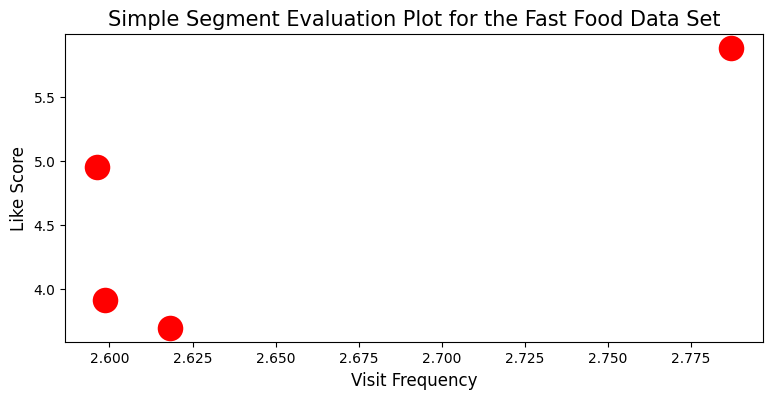

In [107]:
# Merging gender, like, and visit frequency data into one DataFrame
segment_data = gender_mean_df.merge(like_mean_df, on='Cluster_Label', how='left')\
                             .merge(visit_freq_df, on='Cluster_Label', how='left')


print(segment_data)

# Creating scatter plot
plt.figure(figsize=(9, 4))
sns.scatterplot(x="Visit_Frequency_Encoded", y="Like_Encoded", data=segment_data, s=400, color="r")

# Seting plot titles and labels
plt.title("Simple Segment Evaluation Plot for the Fast Food Data Set", fontsize=15)
plt.xlabel("Visit Frequency", fontsize=12)
plt.ylabel("Like Score", fontsize=12)

plt.show()


As we can see, the table shows the average values of gender distribution, like score, and visit frequency for each customer segment. Cluster 0 has the highest Like Score (5.88), indicating strong preference for McDonald's, while Cluster 2 has the lowest (3.69). Visit frequency is fairly consistent across clusters, with slight variations. This helps understand which segments like McDonald's the most and how often they visit, allowing for better-targeted marketing strategies.

#**Customizing the Marketing Mix for Target Segments**

If McDonald's wants to attract young customers (Segment 3) who like the food but find it expensive, they could introduce a MC SUPER BUDGET product line to meet their price expectations (Price). Over time, as these customers earn more, they may switch to the regular menu. To avoid affecting the main product line, the MC SUPER BUDGET items should have distinct features (Product). The promotion should use channels popular with this segment (Promotion), while the distribution remains the same but could include a separate budget-friendly lane (Place). This approach helps retain customers and build long-term loyalty.

#**Evaluating and Monitoring Market Segments**

After implementing the market segmentation strategy, it is essential to evaluate its success and continuously monitor changes in customer behavior and the overall market. For example, Segment 3 customers may start earning more, making the MCSUPERBUDGET line less relevant for them. Additionally, new competitors or market shifts may require adjustments in McDonald’s strategy. Regular monitoring ensures that marketing efforts stay effective and adaptable to evolving consumer needs.